<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #7: Clasificación y Agrupación
`Fecha de entrega: Octubre 24, 2020. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
# Cargar datos
path = 'reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()
#Solo necesito tomar review_body y product_category

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [6]:
data1 =data.filter(["review_body","product_category"])
data1.head()

,review_body,product_category
0,"Buen. Buena calidad, y buena presentación.",jewelry
1,"Un producto a perfecto, para salir de casa con...",video_games
2,No funciona con Nintendo Switch. No hay forma ...,video_games
3,"Recomendado, los utilizo para pc y no me dan n...",video_games
4,El cable funciona bien podria ser un poco mas ...,video_games


In [43]:
data.product_category.value_counts()

jewelry        502
video_games    498
Name: product_category, dtype: int64

# Parte 1: Clasificación

### `[6 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [7]:
train, test = train_test_split(data1, test_size=0.2, random_state=42)
 
print(f"El conjunto de datos de entrenamiento tiene {train.shape[0]} registros")
print(f"El conjunto de datos de prueba tiene {test.shape[0]} registros")

El conjunto de datos de entrenamiento tiene 800 registros
El conjunto de datos de prueba tiene 200 registros


In [14]:
train.columns

Index(['review_body', 'product_category'], dtype='object')

###  `[6 pts]` Punto 2: Hacer pre-procesamiento del texto

In [9]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [15]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values
 
X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

In [40]:
X_train

<800x3221 sparse matrix of type '<class 'numpy.float64'>'
	with 9494 stored elements in Compressed Sparse Row format>

###  `[6 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, u otro.

In [17]:
#Vamos a entrenar el modelo
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

###  `[6 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [18]:
#Exactitud
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")

Naive Bayes:            0.86


In [23]:
metricas = [precision_score, recall_score, f1_score]
for metrica in metricas:
     print(metrica.__name__)
     print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='video_games'):>15.2f}")
     print()

precision_score
Naive Bayes:            0.94

recall_score
Naive Bayes:            0.79

f1_score
Naive Bayes:            0.86



###  `[BONUS: 3 pts]` Matriz de confusión

Text(0.5, 1.0, 'Naive Bayes')

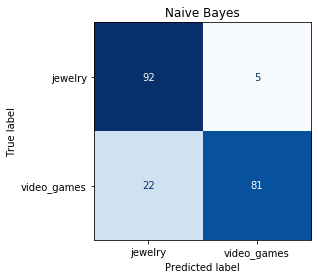

In [25]:
plot_confusion_matrix(nb, X_test, y_test, cmap = 'Blues').im_.colorbar.remove()
plt.title("Naive Bayes")

###  `[BONUS: 1 pts]` Términos más importantes de cada categoría

# Parte 2: Agrupación

###  `[6 pts]` Punto 1: Hacer pre-procesamiento del texto

In [26]:
# Cargar datos
path = 'reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [36]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())

###  `[6 pts]` Punto 2: Método del codo para determinar $K$

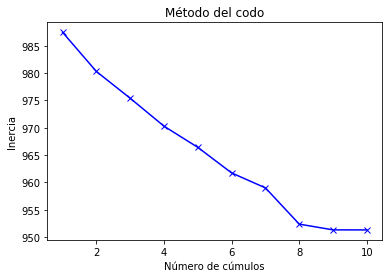

In [41]:
ks = []
k_inertia = [] 

for k in range(1,11):
     kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
     ks.append(k)
     k_inertia.append(kmeans.inertia_)

plt.xlabel('Número de cúmulos')
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertia, 'bx-')

###  `[6 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [44]:
k = 8
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)
nbrs = NearestNeighbors(n_neighbors=3, metric="euclidean").fit(tfidf_matrix.values)

In [49]:
data['cluster'] = model.labels_
clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)


centroids = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()


In [52]:
print(order_centroids)

[[2535 3378 1993 ... 2048  446  372]
 [1885 1324 1894 ...  259 1629  370]
 [ 350 1981 3413 ... 1269 1712  372]
 ...
 [2094 1339 2515 ... 1269 3525  259]
 [ 446  397  335 ... 1981 1746  372]
 [2673  446  397 ... 1990 1712  372]]


In [57]:
data['cluster'] = model.labels_
clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

#print(f"{color.BOLD}CLUSTERS:\n{color.END}")
centroids = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()

for i in range(k):
    print(f"Cluster {i}")
    print(f"COUNT  {clust_cnt[i]} comments ({clust_cnt_pct[i]:.2%} of the data)")
    print(f"TERMS ", end=" ")
    for ind in order_centroids[i, :20]:
        print(f'{terms[ind]}', end=" "),
    print(f"\nREPRESENTATIVE COMMENTS")
    for comment in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]]['review_body'].values:
        print(f"* {comment}")
    print("\n")

Cluster 0
COUNT  39 comments (3.90% of the data)
TERMS  perfecto tiempo llegó gracias sido rápido producto poner justo castellano encanta opción switch descripción rapido igual tamaño éxito familia recomendable 
REPRESENTATIVE COMMENTS
* Todo en perfecto estado
* Perfecto y en tiempo
* Llegó a tiempo y en perfecto estado


Cluster 1
COUNT  94 comments (9.40% of the data)
TERMS  juego español jugar viene versión italiano si bien caja hijo buen pena divertido gran llegar gustado perfectamente ingles edición así 
REPRESENTATIVE COMMENTS
* Esperaba más del juego.
* No me ha gustado el juego.
* Un juego para mi hijo. No se ha pasado mucho tiempo jugando con él. No puedo opinar mucho más sobre este juego.


Cluster 2
COUNT  109 comments (10.90% of the data)
TERMS  bien llegado todavía producto cadena quedan buen queda regalo día aunque imagen demás recomiendo va funciona si aun llego ahora 
REPRESENTATIVE COMMENTS
* Por el precio que tiene está muy bien
* Está bien por su precio
* Muy bien. 

###  `[BONUS: 3 pts]` Visualización usando PCA

# Parte 3: Comparación

### `[6 pts]` Punto 1: Hacer predicción para estas dos frases de los dos modelos

In [58]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
# transformar con tfidf usado para clasificación
nuevo_trans = tfidf_vect.transform(test)
# transformar con tfidf usado para agrupación

# resultado para clasificación
model.predict(nuevo_trans)
# resultado para agrupación

array([1, 6])

### `[2 pts]` Punto 2: Preguntas

- ¿A cuál modelo le fue mejor? 
- ¿Cuál modelo se demoró más en entrenar? 
- Según los resultados del $K$-Means, ¿cuál es la estructura latente de los datos?
- ¿Alguna otra observación?